# [실습] CNN활용_데이터증강_전이학습_개고양이 분류(Kaggel)_ResNet50_Data_Augmentation

* 데이터출처: https://www.kaggle.com/tongpython/cat-and-dog

In [37]:
# 라이브러리 불러오기

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import optimizers

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Found 8005 images belonging to 1 classes.
Found 2023 images belonging to 1 classes.


### ImageDataGenerator

In [9]:
# 케라스로 ImageDataGenerator 클래스 함수를 실행하고
#rescale옵션을 지정해 이미지 각 픽셀의 값을 0~1로 정규화한다.
# 생성된 제너레이터 객체를 image_gen변수에 할당한다.

train_datagen = ImageDataGenerator(rescale=1./255, 
                                   horizontal_flip = True,
                                   width_shift_range=0.1,
                                   height_shift_range=0.1,
                                   rotation_range=5)

test_datagen = ImageDataGenerator(rescale=1./255, 
                                   horizontal_flip = True,
                                   width_shift_range=0.1,
                                   height_shift_range=0.1,
                                   rotation_range=5)


### flow_from_directory함수

In [10]:
# flow_from_directory함수로 폴더에서 이미지를 가져와 제너레이터 객체로 정리


train_dir = './cat_dog_data/training_set/training_set'
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(224, 224),
                                                    batch_size=32,
                                                    classes=['cats', 'dogs'],
                                                    class_mode='binary',
                                                    seed=2024)

test_dir = './cat_dog_data/test_set/test_set'
test_generator = test_datagen.flow_from_directory(test_dir,
                                                  target_size=(224, 224),
                                                  batch_size=32,
                                                  classes=['cats', 'dogs'],
                                                  class_mode = 'binary',
                                                  seed=2024)

Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


In [11]:
# 샘플 이미지 출력(첫번째 배치 32장 이미지 확인)
zero_batch = next(train_generator)
len(zero_batch)

2

In [12]:
type(zero_batch)

tuple

In [17]:
zero_batch[0].shape  # 224 x 224이고 3개(RGB) 채널 가진 사진 32장

(32, 224, 224, 3)

In [19]:
zero_batch[1].shape  # 32장 사진의 레이블 (0: cat, 1:dog)

(32,)

In [22]:
pd.Series(zero_batch[1]).value_counts()  # 32장 중 고양이 11, 강아지 21

1.0    21
0.0    11
Name: count, dtype: int64

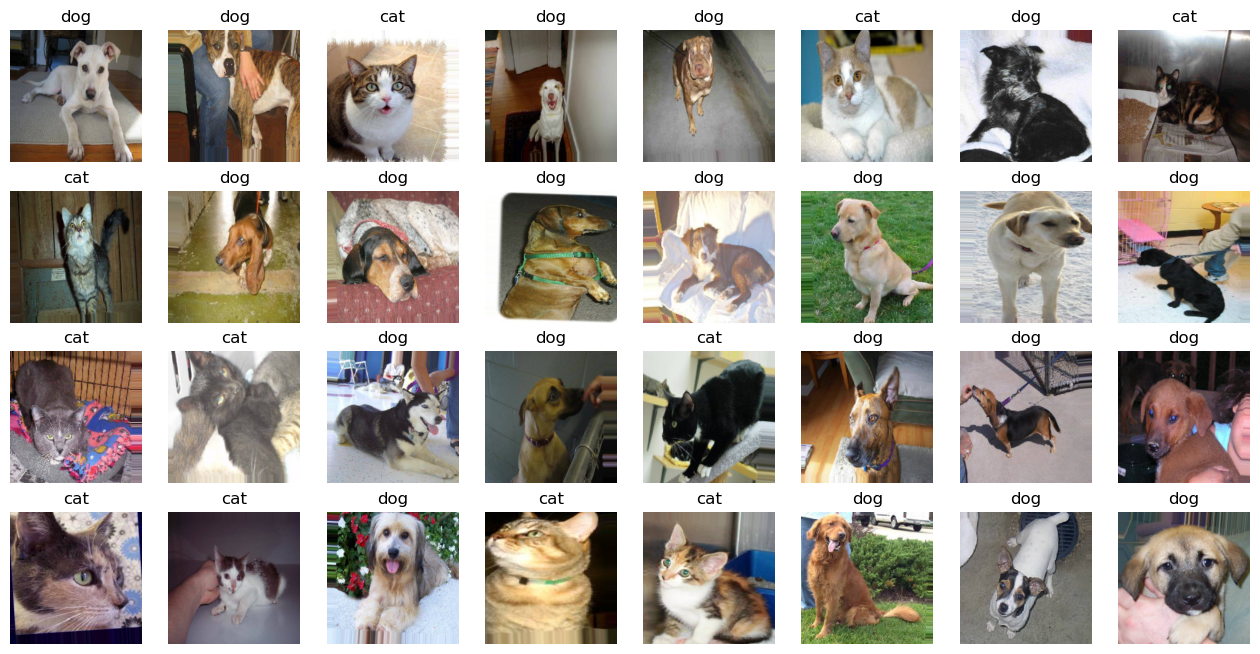

In [36]:
# 32장의 사진 시각화
class_label = ['cat', 'dog']

plt.figure(figsize=(16, 8))
for i in range(len(zero_batch[0])):
    ax = plt.subplot(4, 8, i+1)
    #plt.figure(figsize=(6, 6))
    plt.imshow(zero_batch[0][i])
    plt.title(class_label[int(zero_batch[1][i])])
    plt.axis('off')

### 모델 훈련

In [41]:
# Sequential API를 활용하여 샘플 모델 생성
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape = (224, 224, 3), 
                 padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(units=256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=1, activation='sigmoid'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 112, 112, 32)      0         
 g2D)                                                            
                                                                 
 batch_normalization_4 (Bat  (None, 112, 112, 32)      128       
 chNormalization)                                                
                                                                 
 conv2d_5 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 56, 56, 64)        0         
 g2D)                                                            
                                                      

In [42]:
# 모델 컴파일
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [43]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

In [44]:
# 모델 훈련
hist = model.fit(train_generator, validation_data=test_generator, 
                 epochs=10, verbose=2)

Epoch 1/10


251/251 - 233s - loss: 2.9976 - accuracy: 0.5245 - val_loss: 2.7177 - val_accuracy: 0.5096 - 233s/epoch - 930ms/step
Epoch 2/10
251/251 - 177s - loss: 0.7013 - accuracy: 0.5099 - val_loss: 0.6962 - val_accuracy: 0.5230 - 177s/epoch - 705ms/step
Epoch 3/10
251/251 - 176s - loss: 0.6859 - accuracy: 0.5273 - val_loss: 0.6884 - val_accuracy: 0.5151 - 176s/epoch - 701ms/step
Epoch 4/10
251/251 - 182s - loss: 0.6883 - accuracy: 0.5434 - val_loss: 0.6750 - val_accuracy: 0.6298 - 182s/epoch - 726ms/step
Epoch 5/10
251/251 - 189s - loss: 0.6780 - accuracy: 0.5583 - val_loss: 0.6618 - val_accuracy: 0.5823 - 189s/epoch - 753ms/step
Epoch 6/10
251/251 - 177s - loss: 0.6710 - accuracy: 0.5761 - val_loss: 0.6316 - val_accuracy: 0.6515 - 177s/epoch - 707ms/step
Epoch 7/10
251/251 - 226s - loss: 0.6594 - accuracy: 0.5880 - val_loss: 0.6282 - val_accuracy: 0.6817 - 226s/epoch - 900ms/step
Epoch 8/10
251/251 - 232s - loss: 0.6646 - accuracy: 0.5899 - val_loss: 0.6921 - val_accuracy: 0.5126 

In [47]:
pd.DataFrame(hist.history)

,loss,accuracy,val_loss,val_accuracy
0,2.997570,0.524547,2.717664,0.509639
1,0.701325,0.509931,0.696209,0.522986
2,0.685918,0.527295,0.688355,0.515077
3,0.688298,0.543410,0.674973,0.629758
4,0.677958,0.558276,0.661813,0.582304
5,0.671043,0.576140,0.631619,0.651508
6,0.659427,0.588008,0.628229,0.681661
7,0.664617,0.589881,0.692068,0.512605
8,0.658563,0.593129,0.641002,0.631241
9,0.647190,0.614991,0.639024,0.687593


1/1 [==============================] - 0s 36ms/step


'dog'

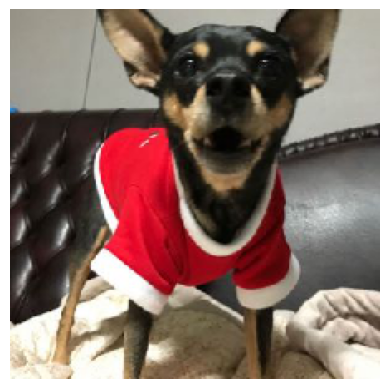

In [63]:
from keras.preprocessing.image import load_img, img_to_array

image = load_img('./IMG_mong.jpg', target_size=(224, 224))
plt.imshow(image)
plt.axis('off')
image = img_to_array(image)
image = image.reshape((1, 224, 224, 3))

y_pred_proba = model.predict(image)
class_label[int(y_pred_proba[0])]

###  데이터 증강

In [ ]:
# 이미지 데이터 제너레이터 정의(  Augmentation 적용)
image_gen_aug = ImageDataGenerator(rescale = 1/255,
                                  horizontal_flip = True,
                                  rotation_range=30, 
                                  shear_range=0.15,
                                  zoom_range=0.3)

# flow_from_directory 함수로 폴더에서 이미지 가져와서 제너레이터 객체로 정리
train_gen_aug = image_gen_aug.flow_from_directory(train_dir,
                                                 batch_size=32,
                                                 target_size=(224, 224),
                                                 classes=['cats', 'dogs'],
                                                 class_mode ='binary',
                                                 seed=2020)
valid_gen_aug = image_gen_aug.flow_from_directory(valid_dir,
                                                 batch_size=32,
                                                 target_size=(224, 224),
                                                 classes=['cats', 'dogs'],
                                                 class_mode ='binary',
                                                 seed=2020)

In [ ]:
# 모델 생성
model_aug = build_model()

In [ ]:
# 모델 컴파일
model_aug.compile(optimizer=tf.optimizers.Adam(learning_rate=0.001), 
                  loss = tf.keras.losses.BinaryCrossentropy(from_logits=False),
                 metrics=['accuracy'])

In [ ]:
# 모델 훈련
history_aug = model_aug.fit(train_gen_aug, validation_data = valid_gen_aug, epochs=40)

In [ ]:
model_aug.save('255.1_cnn_catsndogs_data_aug.h5')

In [ ]:
import pandas as pd
df = pd.DataFrame(history_aug.history)
df.to_csv("./output/255.1_데이터증강_history.csv", index=False)
df = pd.read_csv("./output/255.1_데이터증강_history.csv")
df

In [ ]:
# 손실함수, 정확도 그래프 그리기

import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))
plt.plot(range(1, 21), df['loss'], label='train_loss')
plt.plot(range(1, 21), df['val_loss'], label='val_loss');